In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('tennis_stats.csv')

In [3]:
data.head()

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,...,0.11,0.38,8,0.50,0.43,0.50,1,2,39820,119
1,Roman Safiullin,2017,0.84,0.62,0.26,0.33,0.07,7,0.00,7,...,0.00,0.20,9,0.67,0.41,0.57,0,1,17334,381
2,Pedro Sousa,2017,0.83,0.60,0.28,0.53,0.44,2,0.38,10,...,0.16,0.34,17,0.65,0.45,0.59,4,1,109827,119
3,Rogerio Dutra Silva,2010,0.83,0.64,0.34,0.59,0.33,2,0.33,5,...,0.14,0.34,15,0.80,0.49,0.63,0,0,9761,125
4,Daniel Gimeno-Traver,2017,0.81,0.54,0.00,0.33,0.33,1,0.00,2,...,0.00,0.20,2,0.50,0.35,0.50,0,1,32879,272


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1721 entries, 0 to 1720
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Player                      1721 non-null   object 
 1   Year                        1721 non-null   int64  
 2   FirstServe                  1721 non-null   float64
 3   FirstServePointsWon         1721 non-null   float64
 4   FirstServeReturnPointsWon   1721 non-null   float64
 5   SecondServePointsWon        1721 non-null   float64
 6   SecondServeReturnPointsWon  1721 non-null   float64
 7   Aces                        1721 non-null   int64  
 8   BreakPointsConverted        1721 non-null   float64
 9   BreakPointsFaced            1721 non-null   int64  
 10  BreakPointsOpportunities    1721 non-null   int64  
 11  BreakPointsSaved            1721 non-null   float64
 12  DoubleFaults                1721 non-null   int64  
 13  ReturnGamesPlayed           1721 

In [5]:
data.isnull().any() # Checking for null columns

Player                        False
Year                          False
FirstServe                    False
FirstServePointsWon           False
FirstServeReturnPointsWon     False
SecondServePointsWon          False
SecondServeReturnPointsWon    False
Aces                          False
BreakPointsConverted          False
BreakPointsFaced              False
BreakPointsOpportunities      False
BreakPointsSaved              False
DoubleFaults                  False
ReturnGamesPlayed             False
ReturnGamesWon                False
ReturnPointsWon               False
ServiceGamesPlayed            False
ServiceGamesWon               False
TotalPointsWon                False
TotalServicePointsWon         False
Wins                          False
Losses                        False
Winnings                      False
Ranking                       False
dtype: bool

In [6]:
data.corr()

,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,BreakPointsOpportunities,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
Year,1.000000,0.051406,-0.016728,-0.106784,0.005300,-0.039087,-0.108367,-0.072404,-0.101735,-0.114806,...,-0.073256,-0.078229,-0.108477,-0.008930,-0.041790,-0.005544,-0.108235,-0.077181,0.043908,-0.040483
FirstServe,0.051406,1.000000,-0.070659,0.025488,0.101417,-0.001924,0.048149,-0.018877,0.057709,0.062345,...,-0.010676,0.004189,0.071920,0.137473,0.148349,0.180996,0.064832,0.053736,0.057882,-0.068759
FirstServePointsWon,-0.016728,-0.070659,1.000000,0.021729,0.320765,-0.004724,0.460323,-0.041538,0.301925,0.324853,...,-0.010193,-0.002793,0.376460,0.817829,0.648753,0.860033,0.356702,0.330581,0.361121,-0.150004
FirstServeReturnPointsWon,-0.106784,0.025488,0.021729,1.000000,0.072707,0.301265,0.140165,0.324057,0.295724,0.313338,...,0.757435,0.834267,0.261206,0.091319,0.496682,0.052335,0.256029,0.243278,0.240808,-0.178664
SecondServePointsWon,0.005300,0.101417,0.320765,0.072707,1.000000,0.103584,0.266269,0.052755,0.258691,0.277782,...,0.096622,0.095585,0.296809,0.650764,0.622673,0.713076,0.268979,0.250918,0.281215,-0.181013
SecondServeReturnPointsWon,-0.039087,-0.001924,-0.004724,0.301265,0.103584,1.000000,0.095494,0.264413,0.234212,0.249583,...,0.603755,0.727338,0.209521,0.096553,0.408975,0.055004,0.193093,0.185217,0.199401,-0.159592
Aces,-0.108367,0.048149,0.460323,0.140165,0.266269,0.095494,1.000000,0.037188,0.757405,0.784934,...,0.139987,0.138023,0.866138,0.440922,0.428679,0.472101,0.825301,0.768628,0.798404,-0.277811
BreakPointsConverted,-0.072404,-0.018877,-0.041538,0.324057,0.052755,0.264413,0.037188,1.000000,0.096368,0.086502,...,0.561759,0.387170,0.083182,-0.025670,0.255050,-0.007254,0.076989,0.062297,0.075022,-0.051005
BreakPointsFaced,-0.101735,0.057709,0.301925,0.295724,0.258691,0.234212,0.757405,0.096368,1.000000,0.973352,...,0.335205,0.331043,0.971296,0.354012,0.463110,0.354005,0.883470,0.943309,0.876036,-0.322082
BreakPointsOpportunities,-0.114806,0.062345,0.324853,0.313338,0.277782,0.249583,0.784934,0.086502,0.973352,1.000000,...,0.358483,0.352783,0.978278,0.372271,0.491198,0.380716,0.923453,0.909295,0.900444,-0.334548


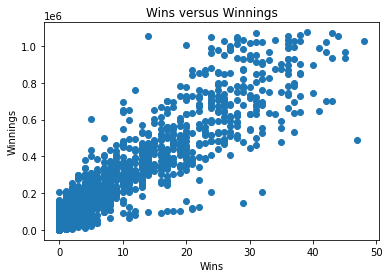

In [8]:
plt.scatter(data['Wins'], data['Winnings'])
plt.xlabel('Wins')
plt.ylabel('Winnings')
plt.title('Wins versus Winnings')
plt.show()

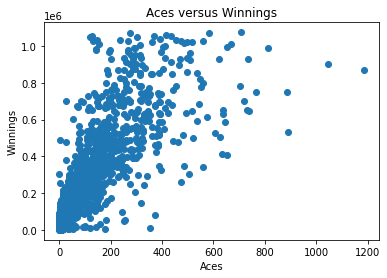

In [16]:
plt.scatter(data['Aces'], data['Winnings'])
plt.xlabel('Aces')
plt.ylabel('Winnings')
plt.title('Aces versus Winnings')
plt.show()

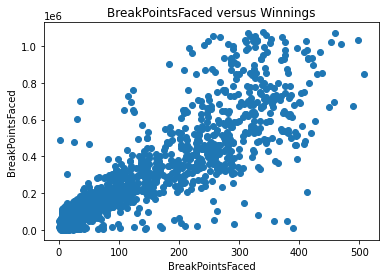

In [10]:
plt.scatter(data['BreakPointsFaced'], data['Winnings'])
plt.xlabel('BreakPointsFaced')
plt.ylabel('Winnings')
plt.title('BreakPointsFaced versus Winnings')
plt.show()

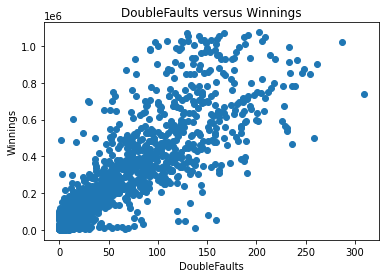

In [14]:
plt.scatter(data['DoubleFaults'], data['Winnings'])
plt.xlabel('DoubleFaults')
plt.ylabel('Winnings')
plt.title('DoubleFaults versus Winnings')
plt.show()

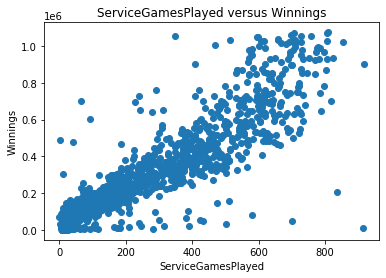

In [15]:
plt.scatter(data['ServiceGamesPlayed'], data['Winnings'])
plt.xlabel('ServiceGamesPlayed')
plt.ylabel('Winnings')
plt.title('ServiceGamesPlayed versus Winnings')
plt.show()

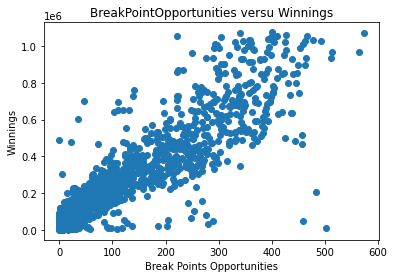

In [13]:
plt.scatter(data['BreakPointsOpportunities'], data['Winnings'])
plt.xlabel('Break Points Opportunities')
plt.ylabel('Winnings')
plt.title('BreakPointOpportunities versu Winnings')
plt.show()

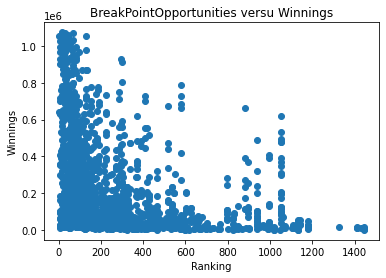

In [18]:
plt.scatter(data['Ranking'], data['Winnings'])
plt.xlabel('Ranking')
plt.ylabel('Winnings')
plt.title('BreakPointOpportunities versu Winnings')
plt.show()

#### LINEAR REGRESSION MODEL USING BreakPointsOpportunities TO PREDICT WINNINGS

In [29]:
features = data[['BreakPointsOpportunities']]
label = data[['Winnings']]

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.20, random_state=42)

In [30]:
reg1 = LinearRegression()
reg1.fit(X_train, y_train)

LinearRegression()

In [31]:
print('Predicting Winnings with BreakPointsOpportunities Test Score:', reg1.score(X_test,y_test))

Predicting Winnings with BreakPointsOpportunities Test Score: 0.7865551696389493


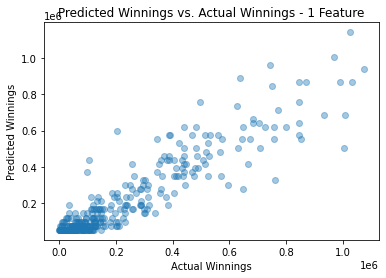

In [39]:
prediction = reg1.predict(X_test)

plt.scatter(y_test,prediction, alpha=0.4)
plt.title('Predicted Winnings vs. Actual Winnings - 1 Feature')
plt.xlabel('Actual Winnings')
plt.ylabel('Predicted Winnings')
plt.show()

Predicting Winnings with Wins Test Score: 0.8417844448929319


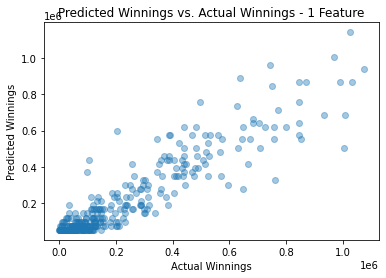

In [38]:
features = data[['Wins']]
label = data[['Winnings']]

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.20, random_state=42)

reg1 = LinearRegression()
reg1.fit(X_train, y_train)

print('Predicting Winnings with Wins Test Score:', reg1.score(X_test,y_test))
prediction = reg1.predict(X_test)

plt.scatter(y_test, prediction, alpha=0.4)
plt.title('Predicted Winnings vs. Actual Winnings - 1 Feature')
plt.xlabel('Actual Winnings')
plt.ylabel('Predicted Winnings')
plt.show()

Predicting Winnings with BreakPointsFaced Test Score: 0.7412654477720719


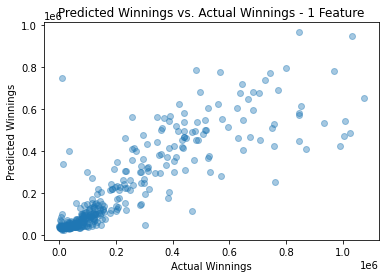

In [37]:
features = data[['BreakPointsFaced']]
label = data[['Winnings']]

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.20, random_state=42)

reg1 = LinearRegression()
reg1.fit(X_train, y_train)

print('Predicting Winnings with BreakPointsFaced Test Score:', reg1.score(X_test,y_test))
prediction = reg1.predict(X_test)

plt.scatter(y_test, prediction, alpha=0.4)
plt.title('Predicted Winnings vs. Actual Winnings - 1 Feature')
plt.xlabel('Actual Winnings')
plt.ylabel('Predicted Winnings')
plt.show()

#### PREDICTING WINNINGS WITH TWO FEATURES

Predicting Winnings with BreakPointsFaced Test Score: 0.8138257742158455


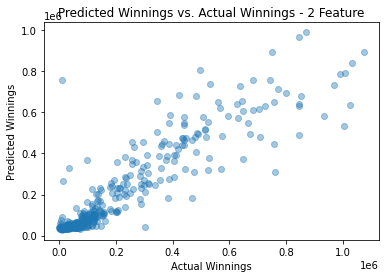

In [40]:
features = data[['Aces','BreakPointsFaced']]
label = data[['Winnings']]

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.20, random_state=42)

reg1 = LinearRegression()
reg1.fit(X_train, y_train)

print('Predicting Winnings with BreakPointsFaced Test Score:', reg1.score(X_test,y_test))
prediction = reg1.predict(X_test)

plt.scatter(y_test, prediction, alpha=0.4)
plt.title('Predicted Winnings vs. Actual Winnings - 2 Feature')
plt.xlabel('Actual Winnings')
plt.ylabel('Predicted Winnings')
plt.show()

Predicting Winnings with BreakPointsFaced Test Score: 0.7413589321918239


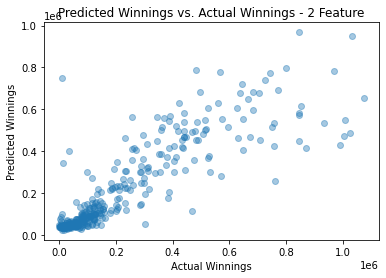

In [41]:
features = data[['BreakPointsConverted','BreakPointsFaced']]
label = data[['Winnings']]

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.20, random_state=42)

reg1 = LinearRegression()
reg1.fit(X_train, y_train)

print('Predicting Winnings with BreakPointsFaced Test Score:', reg1.score(X_test,y_test))
prediction = reg1.predict(X_test)

plt.scatter(y_test, prediction, alpha=0.4)
plt.title('Predicted Winnings vs. Actual Winnings - 2 Feature')
plt.xlabel('Actual Winnings')
plt.ylabel('Predicted Winnings')
plt.show()

Predicting Winnings with BreakPointsFaced Test Score: 0.8437055412385227


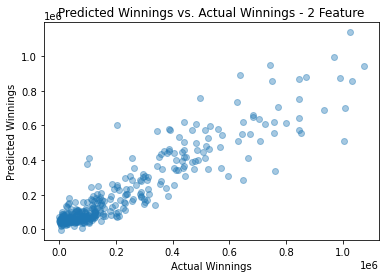

In [42]:
features = data[['FirstServePointsWon','Wins']]
label = data[['Winnings']]

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.20, random_state=42)

reg1 = LinearRegression()
reg1.fit(X_train, y_train)

print('Predicting Winnings with BreakPointsFaced Test Score:', reg1.score(X_test,y_test))
prediction = reg1.predict(X_test)

plt.scatter(y_test, prediction, alpha=0.4)
plt.title('Predicted Winnings vs. Actual Winnings - 2 Feature')
plt.xlabel('Actual Winnings')
plt.ylabel('Predicted Winnings')
plt.show()

#### USING MULTIPLE FEATURES FOR THE PREDICTION OF WINNINGS

Predicting Winnings with BreakPointsFaced Test Score: 0.863277679082166


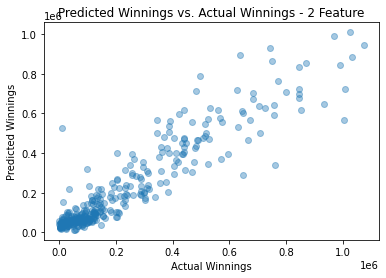

In [48]:
features = data[['FirstServePointsWon', 'SecondServePointsWon', 'Aces', 'BreakPointsSaved', 'BreakPointsOpportunities', 'ReturnGamesWon', 'ServiceGamesWon', 'TotalPointsWon', 'Wins']]
label = data[['Winnings']]

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.20, random_state=42)

reg1 = LinearRegression()
reg1.fit(X_train, y_train)

print('Predicting Winnings with BreakPointsFaced Test Score:', reg1.score(X_test,y_test))
prediction = reg1.predict(X_test)

plt.scatter(y_test, prediction, alpha=0.4)
plt.title('Predicted Winnings vs. Actual Winnings - 2 Feature')
plt.xlabel('Actual Winnings')
plt.ylabel('Predicted Winnings')
plt.show()